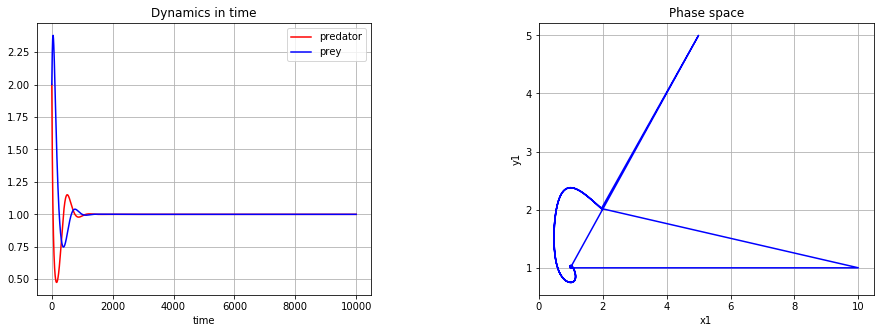

In [29]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
# show plots in notebook
%matplotlib inline
# define system in terms of separated differential equations
def f(x,y):
    return 2*x - x**2 - x*y
def g(x,y):
    return - y + x*y

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(2, 2, 0.01, 1000)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
#ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(1,2,2)
ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')
'''
ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()
'''


x1= np.zeros(1000)
y1 = np.zeros(1000)
x3 = np.zeros(1000)
y3 = np.zeros(1000)
x1,y1 =sys(10,1,0.01,1000)

x3,y3 = sys(5,5,0.01,1000)
ax3.plot(x1, y1, color="blue")

ax3.set_xlabel("x1")
ax3.set_ylabel("y1")  
ax3.set_title("Phase space")
ax3.grid()
plt.show()


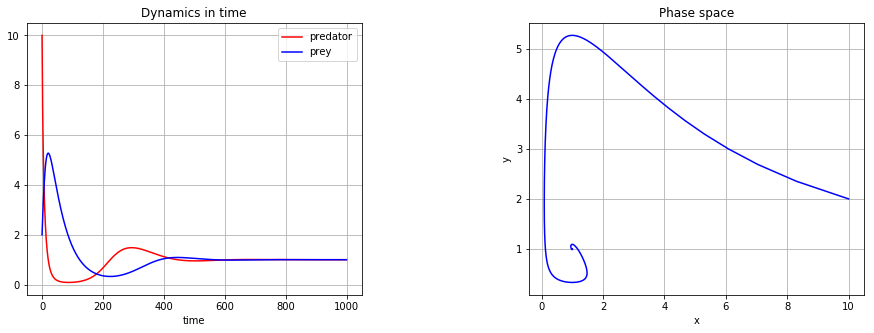

In [16]:
import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

In [10]:

# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

The system has a fixed point in 0,0
The system has a fixed point in 1,1
The system has a fixed point in 2,0


[(0, 0), (1, 1), (2, 0)]

In [11]:
import sympy as sm
# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = 2*r - r**2 - r*c
C = - c + r*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )
print(equilibria)

[(0, 0), (1, 1), (2, 0)]


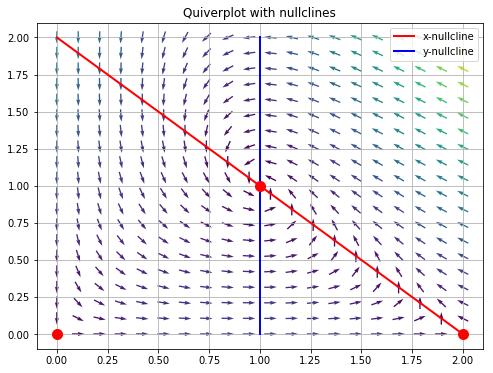

In [12]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [13]:
# needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt

def eigenvalues(x,y):
    # 2*x - x**2 - x*y
    a11 = 2 - 2*x - y                # differentiated with respect to x
    a12 = - x                        # differentiated with respect to y
    # - y + x*y
    a21 = y                          # differentiated with respect to x
    a22 = - 1 + x                    # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (x,y)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (x,y))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (x,y))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (x,y))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print ('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for x,y in fp:
    eigenvalues(x,y)    

Check the fixed point  0, 0
The real part of the first eigenvalue is -1.0
The real part of the second eigenvalue is 2.0
The fixed point in 0, 0 is unstable
----------------------------
Check the fixed point  1, 1
The real part of the first eigenvalue is -0.5
The real part of the second eigenvalue is -0.5
The fixed point in 1, 1 is a sink. It is stable
----------------------------
Check the fixed point  2, 0
The real part of the first eigenvalue is -2.0
The real part of the second eigenvalue is 1.0
The fixed point in 2, 0 is unstable
----------------------------


In [14]:

# here again, in order to avoid interference x = r (for resource) and y = c (for consumer) (see above) 

# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ R, C ])
Mat = sm.Matrix([ r, c ])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('---------------------')

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (r, item[0]), (c, item[1]) ])
    print('The eigenvalues for the fixed point (%s, %s) are %s and %s:' 
          %(item[0], item[1], eqmat.eigenvals().keys()[0], eqmat.eigenvals().keys()[1]))
    print('-------------------------------------------')

Jacobian Matrix([[-c - 2*r + 2, -r], [c, r - 1]])
---------------------


TypeError: 'dict_keys' object does not support indexing